In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('../')
from plancklens import utils

In [2]:
%load_ext autoreload
%autoreload 2
from dance.filtering import WienerFilter
from dance.qe import Reconstruct
from dance.delens import Delens

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [4]:
recon_aniso = Reconstruct(basedir,2048,1,True,"aniso",Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="a_p")

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


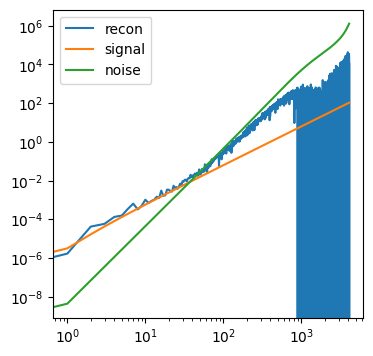

In [5]:
recon_aniso.plot_qcl(2,which='recon')

In [6]:
recon_aniso_kappa = Reconstruct(basedir,2048,1,True,"aniso",Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p")

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


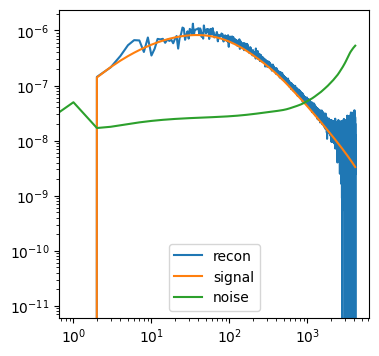

In [7]:
recon_aniso_kappa.plot_qcl(1,which='recon')

In [8]:
delens = Delens(basedir,2048,1,True,"aniso",Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [9]:
delens.delens(2)

(array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.14991672e-02+0.00000000e+00j, ...,
        -1.62783844e-06-1.36629102e-07j,  6.60451972e-07-1.47656662e-06j,
        -3.27407196e-07+1.58522640e-06j]),
 array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -3.85860668e-05+0.00000000e+00j, ...,
         3.75801543e-07-4.78539632e-07j,  1.23144144e-06+4.15093141e-07j,
        -2.99704750e-08-3.00931010e-07j]))

In [10]:
recon_delens = Reconstruct(basedir,2048,1,True,"aniso",Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="a_p",delens=delens)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


Delens Filtering


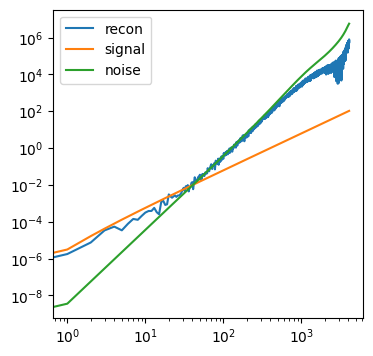

In [19]:
recon_delens.plot_qcl(5,which='recon')

In [12]:
n0_0 = recon_aniso.get_n0(2)

In [13]:
n0_1 = recon_delens.get_n0(2)

In [14]:
len(n0_0),len(n0_1)

(4097, 4097)

In [21]:
1- np.mean(n0_1[:50]/n0_0[:50])

0.1695217640803024

In [15]:
L = np.arange(len(n0_0))
dl = L*(L+1)/(2*np.pi)

(1e-09, 1e-05)

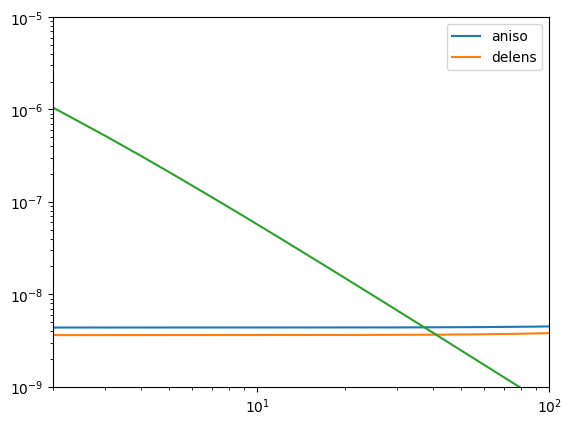

In [16]:
plt.loglog(L,n0_0,label='aniso')
plt.loglog(L,n0_1,label='delens')
plt.loglog(recon_aniso.get_cl_th())
plt.legend()
plt.xlim(2,100)
plt.ylim(1e-9,1e-5)

alm2lenmap_spin: using 48 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:44.540582] (45.0%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:01.863315] (1.9%)  
  build_angles                         :  [0:00:46.403950] (46.9%)  
  synthesis general (STANDARD)         :  [0:00:52.043493] (52.6%)  
  polrot (ducc)                        :  [0:00:00.381153] (0.4%)  
  gclm2lenmap                          :  [0:01:39.032609] (100.0%)  
  Total                                :  [0:01:39.034449] d:h:m:s:mus


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


alm2lenmap_spin: using 48 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:20.517273] (48.9%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:01.857711] (4.4%)  
  build_angles                         :  [0:00:22.375015] (53.4%)  
  synthesis general (STANDARD)         :  [0:00:19.147430] (45.7%)  
  polrot (ducc)                        :  [0:00:00.317744] (0.8%)  
  gclm2lenmap                          :  [0:00:41.930959] (100.0%)  
  Total                                :  [0:00:41.932039] d:h:m:s:mus


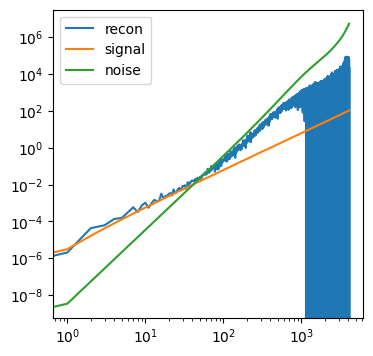

In [27]:
recon_delens.plot_qcl(2,which='recon')